In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("data.csv")  #Loading dataset
print(df.to_string())

      Unnamed: 0  acousticness  danceability  duration_ms  energy  instrumentalness  key  liveness  loudness  mode  speechiness    tempo  time_signature  valence  target                                                                                                                song_title                                                                              artist
0              0      0.010200         0.833       204600  0.4340          0.021900    2    0.1650    -8.795     1       0.4310  150.062             4.0   0.2860       1                                                                                                                  Mask Off                                                                              Future
1              1      0.199000         0.743       326933  0.3590          0.006110    1    0.1370   -10.401     1       0.0794  160.083             4.0   0.5880       1                                                                               

In [4]:
df=df.drop(["Unnamed: 0"],axis=1) #Removing column "Unnamed: 0"
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
df.dtypes #Checking types of data

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [6]:
df=df.rename(columns={"song_title": "Track_name","artist": "Artist"})  #Renaming columns
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,Track_name,Artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [7]:
df.isna().sum() #Checking for missing values

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
Track_name          0
Artist              0
dtype: int64

In [8]:
df.info() #Information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  Track_name        2017 non-null   object 
 15  Artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [9]:
df.shape #To define shape of dataset

(2017, 16)

In [10]:
df.describe() #To return summary statistics for each column

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [11]:
duplicate_df=df[df.duplicated()]  #Checking for duplicate rows
print("number of duplicate rows: ",duplicate_df.shape)
df=df.drop_duplicates()   #Removing duplicate rows

number of duplicate rows:  (5, 16)


In [12]:
df.count()  #After removing duplicate rows

acousticness        2012
danceability        2012
duration_ms         2012
energy              2012
instrumentalness    2012
key                 2012
liveness            2012
loudness            2012
mode                2012
speechiness         2012
tempo               2012
time_signature      2012
valence             2012
target              2012
Track_name          2012
Artist              2012
dtype: int64

In [13]:
# Data Analysis
## Top Popular Artists
top_a=df.groupby("Artist").count().sort_values(by="Track_name",ascending=False)["Track_name"][:5]
print(top_a)

Artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: Track_name, dtype: int64


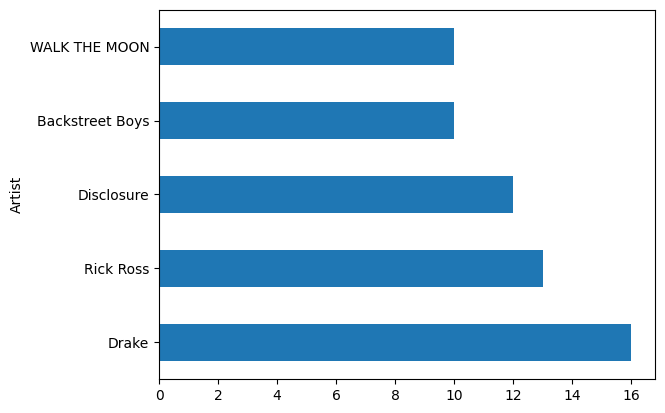

In [14]:
top_a.plot.barh() #Plotting bar graph for top popular artists
plt.show()

In [15]:
##Top 5 energy tracks
top_e=df[["energy","Track_name","Artist"]].sort_values(by="energy",ascending=False)[:5]
top_e

,energy,Track_name,Artist
1299,0.998,No Absolution,Thy Art Is Murder
1322,0.997,Pitchblack,Walking Dead On Broadway
1297,0.994,A Darkened Gospel,A Wake in Providence
1347,0.993,Unanswered,Suicide Silence
2015,0.992,First Contact,Twin Moons


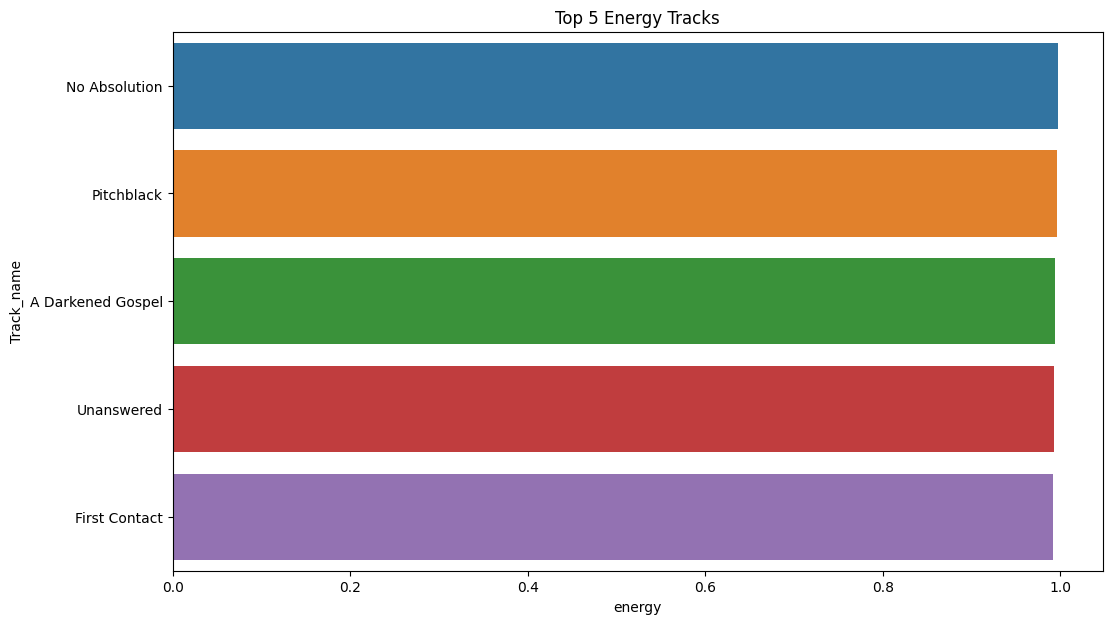

In [16]:
plt.figure(figsize=(12,7))
sns.barplot(x="energy",y="Track_name",data=top_e)  #Plotting bar graph
plt.title("Top 5 Energy Tracks")
plt.show()

In [17]:
## Artist with most loudest tracks
top_l=df[["loudness","Track_name","Artist"]].sort_values(by="loudness",ascending=True)[:5]
top_l

,loudness,Track_name,Artist
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta",Edvard Grieg
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends",Robert Schumann
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can...",Robert Schumann
1531,-30.447,"I Was So Young, and You Were So Beautiful",Bill Charlap
1549,-29.460,Eleanor,Hank Jones


In [18]:
## Top 5 instrumentalness tracks
top_i=df[["instrumentalness","Artist","Track_name"]].sort_values(by="instrumentalness",ascending=False)[:5]
top_i

,instrumentalness,Artist,Track_name
1313,0.976,Signs of the Swarm,Senseless Order
271,0.968,Prince Rama,So Destroyed (channeling Rage Peace)
1575,0.964,Ray Bryant,A Hundred Dreams from Now
1619,0.958,John Dahlbäck,Raven
725,0.957,Todd Terje,Strandbar (disko)


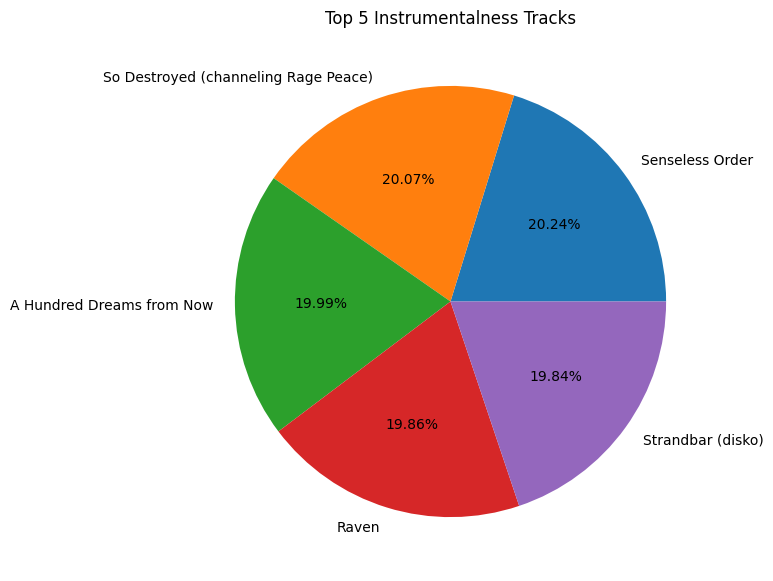

In [19]:
plt.figure(figsize=(12,7))
plt.pie(x="instrumentalness",data=top_i,autopct='%1.2f%%',labels=top_i.Track_name) #Plotting pie chart
plt.title("Top 5 Instrumentalness Tracks")
plt.show()

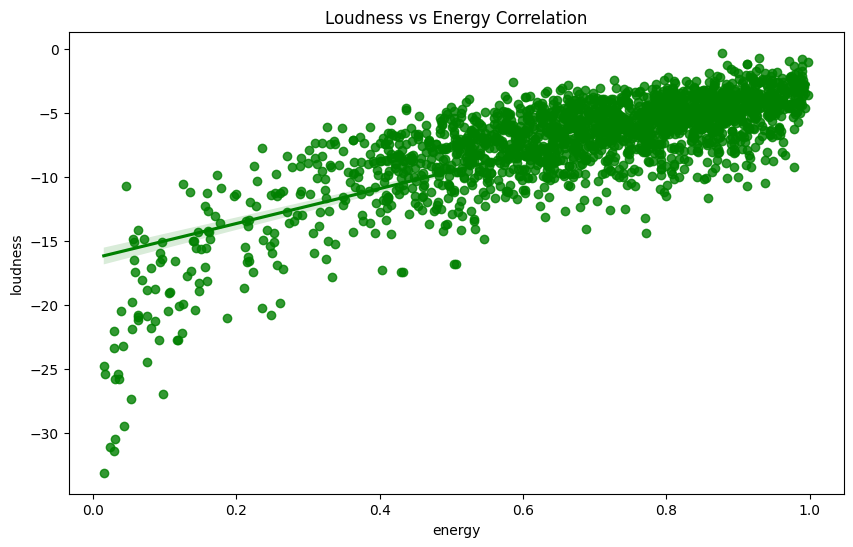

In [28]:
plt.figure(figsize=(10,6))
sns.regplot(x="energy",y="loudness",data=df,color="g").set(title="Loudness vs Energy Correlation")
plt.show()